In [188]:
import csv
import math
import os

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stat

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn_lvq import GlvqModel
from sklearn.svm import SVC

**Loading Data and Preview**

In [189]:
my_data = pd.read_csv('train.csv')
my_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [190]:
cleanup_nums = {"label":     {"correct": 1, "incorrect": 0}}
my_data.replace(cleanup_nums, inplace=True)
my_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,1


In [191]:
print('Data set size = ', my_data.shape)
my_data.dtypes

Data set size =  (17176, 14)


tripid                         int64
additional_fare              float64
duration                     float64
meter_waiting                float64
meter_waiting_fare           float64
meter_waiting_till_pickup    float64
pickup_time                   object
drop_time                     object
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
label                          int64
dtype: object

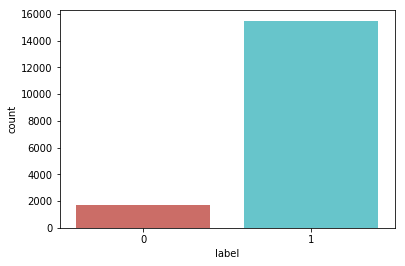

In [192]:
sns.countplot(x='label', data=my_data, palette='hls')
plt.show()

**Preprocessing**

In [193]:
cols = my_data.columns.values
cols = np.delete(cols,[0,6,7,8,9,10,11]) #remove id column

fresh_my_data = my_data[cols]
#fresh_my_data = fresh_my_data[~np.isnan(fresh_my_data).any(axis=1)] #remove missing values
fresh_my_data = fresh_my_data.dropna(axis=0)
cols = np.delete(cols,-1) #remove label column

print(cols)
x = fresh_my_data[cols]
y = fresh_my_data['label']
print('Data set size = ', fresh_my_data.shape)
fresh_my_data.head()

['additional_fare' 'duration' 'meter_waiting' 'meter_waiting_fare'
 'meter_waiting_till_pickup' 'fare']
Data set size =  (16968, 7)


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label
0,10.5,834.0,56.0,0.0000,64.0,270.32,1
1,10.5,791.0,47.0,0.0000,134.0,197.85,1
2,10.5,1087.0,80.0,0.0000,61.0,301.64,1
3,10.5,598.0,271.0,15.6638,68.0,82.30,1
5,10.5,3407.0,182.0,0.0000,112.0,1065.02,1


**Logistic Regression Algorithm**

In [194]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\hesithaw\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [195]:
y_train.head()

5307     1
9848     0
12618    1
4866     0
10346    1
Name: label, dtype: int64

In [196]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [197]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 114  791]
 [  40 9236]]


In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.13      0.22       905
           1       0.92      1.00      0.96      9276

   micro avg       0.92      0.92      0.92     10181
   macro avg       0.83      0.56      0.59     10181
weighted avg       0.91      0.92      0.89     10181



**Decision Tree - gini**

In [145]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=0)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [146]:
y_pred = clf_gini.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9217169236813673


In [147]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8876  400]
 [ 397  508]]


In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9276
           1       0.56      0.56      0.56       905

   micro avg       0.92      0.92      0.92     10181
   macro avg       0.76      0.76      0.76     10181
weighted avg       0.92      0.92      0.92     10181



**Decision Tree - entropy**

In [177]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [178]:
y_pred = clf_entropy.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9161264977411118


In [179]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4400  225]
 [ 202  264]]


In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4625
           1       0.54      0.57      0.55       466

   micro avg       0.92      0.92      0.92      5091
   macro avg       0.75      0.76      0.75      5091
weighted avg       0.92      0.92      0.92      5091



**Random Forest**

In [199]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
clf=RandomForestClassifier(n_estimators=80)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [200]:
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9436260066784522


In [201]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 250  216]
 [  71 4554]]


In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64       466
           1       0.95      0.98      0.97      4625

   micro avg       0.94      0.94      0.94      5091
   macro avg       0.87      0.76      0.80      5091
weighted avg       0.94      0.94      0.94      5091



**K Nearest**

In [157]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=0)
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [158]:
y_pred = classifier.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9399862488950005


In [159]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9191   85]
 [ 526  379]]


In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9276
           1       0.82      0.42      0.55       905

   micro avg       0.94      0.94      0.94     10181
   macro avg       0.88      0.70      0.76     10181
weighted avg       0.93      0.94      0.93     10181



**Gaussian NB**

In [161]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=0)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [162]:
y_pred = gnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.905903152931932


In [163]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9109  167]
 [ 791  114]]


In [164]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9276
           1       0.41      0.13      0.19       905

   micro avg       0.91      0.91      0.91     10181
   macro avg       0.66      0.55      0.57     10181
weighted avg       0.87      0.91      0.88     10181



**lvq**

In [165]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=0)
glvq = GlvqModel()
glvq.fit(X_train, y_train)

GlvqModel(C=None, beta=2, display=False, gtol=1e-05, initial_prototypes=None,
     max_iter=2500, prototypes_per_class=1, random_state=None)

In [166]:
y_pred = glvq.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8839996071112858


In [167]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8894  382]
 [ 799  106]]


In [168]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      9276
           1       0.22      0.12      0.15       905

   micro avg       0.88      0.88      0.88     10181
   macro avg       0.57      0.54      0.54     10181
weighted avg       0.86      0.88      0.87     10181



**SVM**

In [76]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=0)
svm = SVC(kernel='rbf')
#svm = SVC(kernel='sigmoid')

In [77]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

C:\Users\hesithaw\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.9112071505745998


In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9276    0]
 [ 904    1]]


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      9276
           1       1.00      0.00      0.00       905

   micro avg       0.91      0.91      0.91     10181
   macro avg       0.96      0.50      0.48     10181
weighted avg       0.92      0.91      0.87     10181

